# # Telematics Data Exploratory Data Analysis

## 1. Setup and Data Loading

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load the data
df = pd.read_csv('../data/processed/processed_trips_1200_drivers.csv')

print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage().sum() / 1024**2:.2f} MB")


Dataset shape: (17819, 19)
Memory usage: 2.58 MB


## 2. Initial Data Overview

In [4]:
# Display basic information
print("\n=== Dataset Info ===")
df.info()

print("\n=== First 5 Rows ===")
df.head()



=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17819 entries, 0 to 17818
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   trip_id                    17819 non-null  object 
 1   driver_id                  17819 non-null  object 
 2   driver_trip_number         17819 non-null  int64  
 3   duration_minutes           17819 non-null  float64
 4   distance_miles             17819 non-null  float64
 5   average_speed_mph          17819 non-null  float64
 6   max_speed_mph              17819 non-null  float64
 7   harsh_braking_events       17819 non-null  int64  
 8   harsh_acceleration_events  17819 non-null  int64  
 9   sharp_cornering_events     17819 non-null  int64  
 10  phone_usage_seconds        17819 non-null  int64  
 11  speeding_percent           17819 non-null  float64
 12  night_driving              17819 non-null  int64  
 13  rush_hour               

,trip_id,driver_id,driver_trip_number,duration_minutes,distance_miles,average_speed_mph,max_speed_mph,harsh_braking_events,harsh_acceleration_events,sharp_cornering_events,phone_usage_seconds,speeding_percent,night_driving,rush_hour,time_of_day,start_zone,end_zone,data_quality_score,gps_accuracy_avg
0,trip_016937,0002af179ff1223f,1,17.3,9.64,26.0,27.3,1,1,0,0,0.036,1,0,early_morning,zone_37.67_-122.28,zone_37.64_-122.37,0.708209,21.113862
1,trip_016938,0002af179ff1223f,2,6.7,4.64,43.0,57.1,1,0,0,0,0.109,0,1,morning_commute,zone_37.83_-122.26,zone_37.89_-122.19,0.996235,20.336994
2,trip_016939,0002af179ff1223f,3,34.2,28.98,48.8,51.7,2,0,0,0,0.093,0,1,evening_commute,zone_37.65_-122.36,zone_37.71_-122.29,0.896670,15.342455
3,trip_016940,0002af179ff1223f,4,28.0,24.95,35.9,46.3,0,1,1,0,0.072,0,1,evening_commute,zone_37.79_-122.42,zone_37.71_-122.46,0.985350,18.978125
4,trip_016941,0002af179ff1223f,5,11.6,4.80,39.9,50.9,0,0,0,0,0.079,0,1,morning_commute,zone_37.87_-122.36,zone_37.84_-122.43,0.983278,9.109515


In [5]:
# Check for missing values
print("\n=== Missing Values ===")
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0])
else:
    print("No missing values found!")

# Basic statistics
print("\n=== Numerical Features Summary ===")
df.describe().round(2)



=== Missing Values ===
No missing values found!

=== Numerical Features Summary ===


,driver_trip_number,duration_minutes,distance_miles,average_speed_mph,max_speed_mph,harsh_braking_events,harsh_acceleration_events,sharp_cornering_events,phone_usage_seconds,speeding_percent,night_driving,rush_hour,data_quality_score,gps_accuracy_avg
count,17819.00,17819.00,17819.00,17819.00,17819.00,17819.00,17819.00,17819.00,17819.00,17819.00,17819.0,17819.00,17819.00,17819.00
mean,8.48,29.78,17.91,36.30,46.37,2.03,1.62,1.20,3.63,0.14,0.2,0.61,0.90,15.00
std,5.15,17.18,12.76,10.01,12.20,2.48,2.05,1.62,12.16,0.17,0.4,0.49,0.09,7.08
min,1.00,5.00,-8.21,1.80,8.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.35,5.08
25%,4.00,17.10,8.85,29.30,37.90,0.00,0.00,0.00,0.00,0.03,0.0,0.00,0.86,9.80
50%,8.00,26.70,14.87,35.50,45.40,1.00,1.00,1.00,0.00,0.07,0.0,1.00,0.93,13.37
75%,12.00,38.70,23.56,42.30,53.90,3.00,2.00,2.00,0.00,0.16,0.0,1.00,0.97,18.47
max,29.00,173.90,119.56,75.80,108.50,27.00,20.00,15.00,127.00,1.00,1.0,1.00,1.00,66.60


## 3. Driver-Level Analysis

In [6]:
# Aggregate data by driver
driver_stats = df.groupby('driver_id').agg({
    'trip_id': 'count',
    'duration_minutes': ['sum', 'mean'],
    'distance_miles': ['sum', 'mean'],
    'harsh_braking_events': ['sum', 'mean'],
    'harsh_acceleration_events': ['sum', 'mean'],
    'sharp_cornering_events': ['sum', 'mean'],
    'phone_usage_seconds': ['sum', 'mean'],
    'speeding_percent': 'mean',
    'night_driving': 'mean',
    'rush_hour': 'mean'
}).round(2)

driver_stats.columns = ['_'.join(col).strip() for col in driver_stats.columns]
driver_stats.rename(columns={'trip_id_count': 'total_trips'}, inplace=True)

print(f"Total unique drivers: {len(driver_stats)}")
print(f"\nDriver statistics summary:")
driver_stats.describe().round(2)


Total unique drivers: 1200

Driver statistics summary:


,total_trips,duration_minutes_sum,duration_minutes_mean,distance_miles_sum,distance_miles_mean,harsh_braking_events_sum,harsh_braking_events_mean,harsh_acceleration_events_sum,harsh_acceleration_events_mean,sharp_cornering_events_sum,sharp_cornering_events_mean,phone_usage_seconds_sum,phone_usage_seconds_mean,speeding_percent_mean,night_driving_mean,rush_hour_mean
count,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00
mean,14.85,442.23,29.71,265.89,17.86,30.10,2.02,24.12,1.62,17.89,1.20,53.88,3.65,0.14,0.19,0.61
std,4.05,141.48,4.67,110.25,5.31,24.96,1.54,20.08,1.24,15.12,0.94,58.65,3.90,0.13,0.11,0.13
min,4.00,92.20,16.82,52.21,5.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.20
25%,12.00,340.82,26.57,189.56,13.97,12.00,0.89,10.00,0.71,7.00,0.50,3.75,0.27,0.05,0.12,0.53
50%,15.00,439.85,29.28,251.12,17.22,22.00,1.50,17.00,1.19,13.00,0.87,36.00,2.50,0.08,0.19,0.62
75%,17.00,525.30,32.69,328.34,21.10,38.00,2.94,32.00,2.24,23.00,1.76,84.00,5.68,0.25,0.27,0.70
max,29.00,1025.30,49.82,919.82,37.39,158.00,7.11,109.00,6.50,82.00,5.14,400.00,30.00,0.50,0.64,1.00


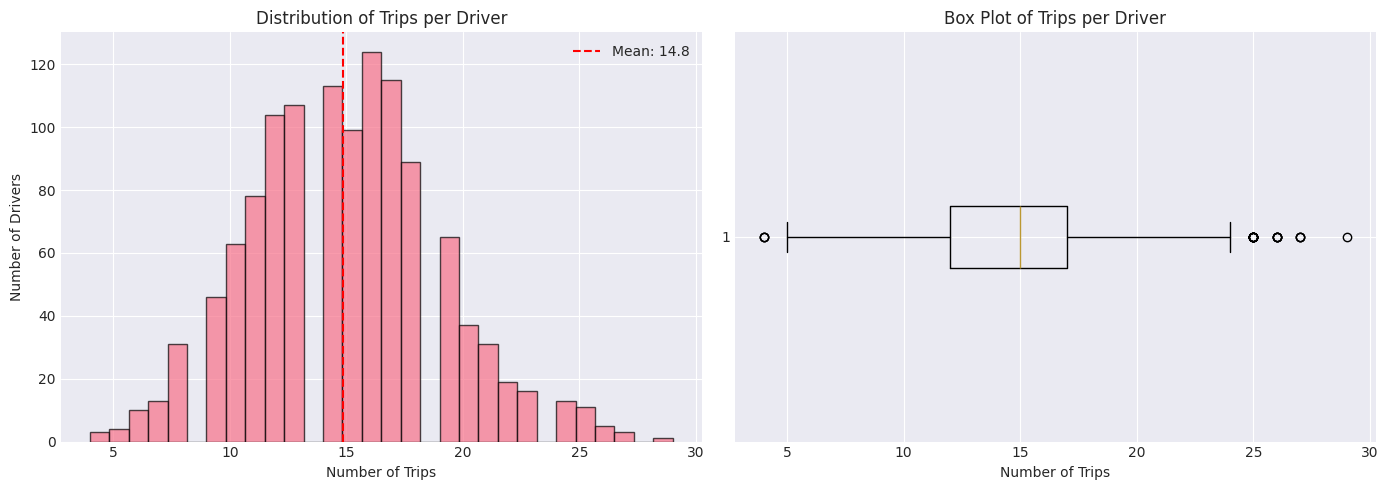

In [7]:
# Distribution of trips per driver
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax1.hist(driver_stats['total_trips'], bins=30, edgecolor='black', alpha=0.7)
ax1.set_xlabel('Number of Trips')
ax1.set_ylabel('Number of Drivers')
ax1.set_title('Distribution of Trips per Driver')
ax1.axvline(driver_stats['total_trips'].mean(), color='red', linestyle='--', 
            label=f'Mean: {driver_stats["total_trips"].mean():.1f}')
ax1.legend()

# Box plot
ax2.boxplot(driver_stats['total_trips'], vert=False)
ax2.set_xlabel('Number of Trips')
ax2.set_title('Box Plot of Trips per Driver')

plt.tight_layout()
plt.show()


## 4. Trip Characteristics Analysis

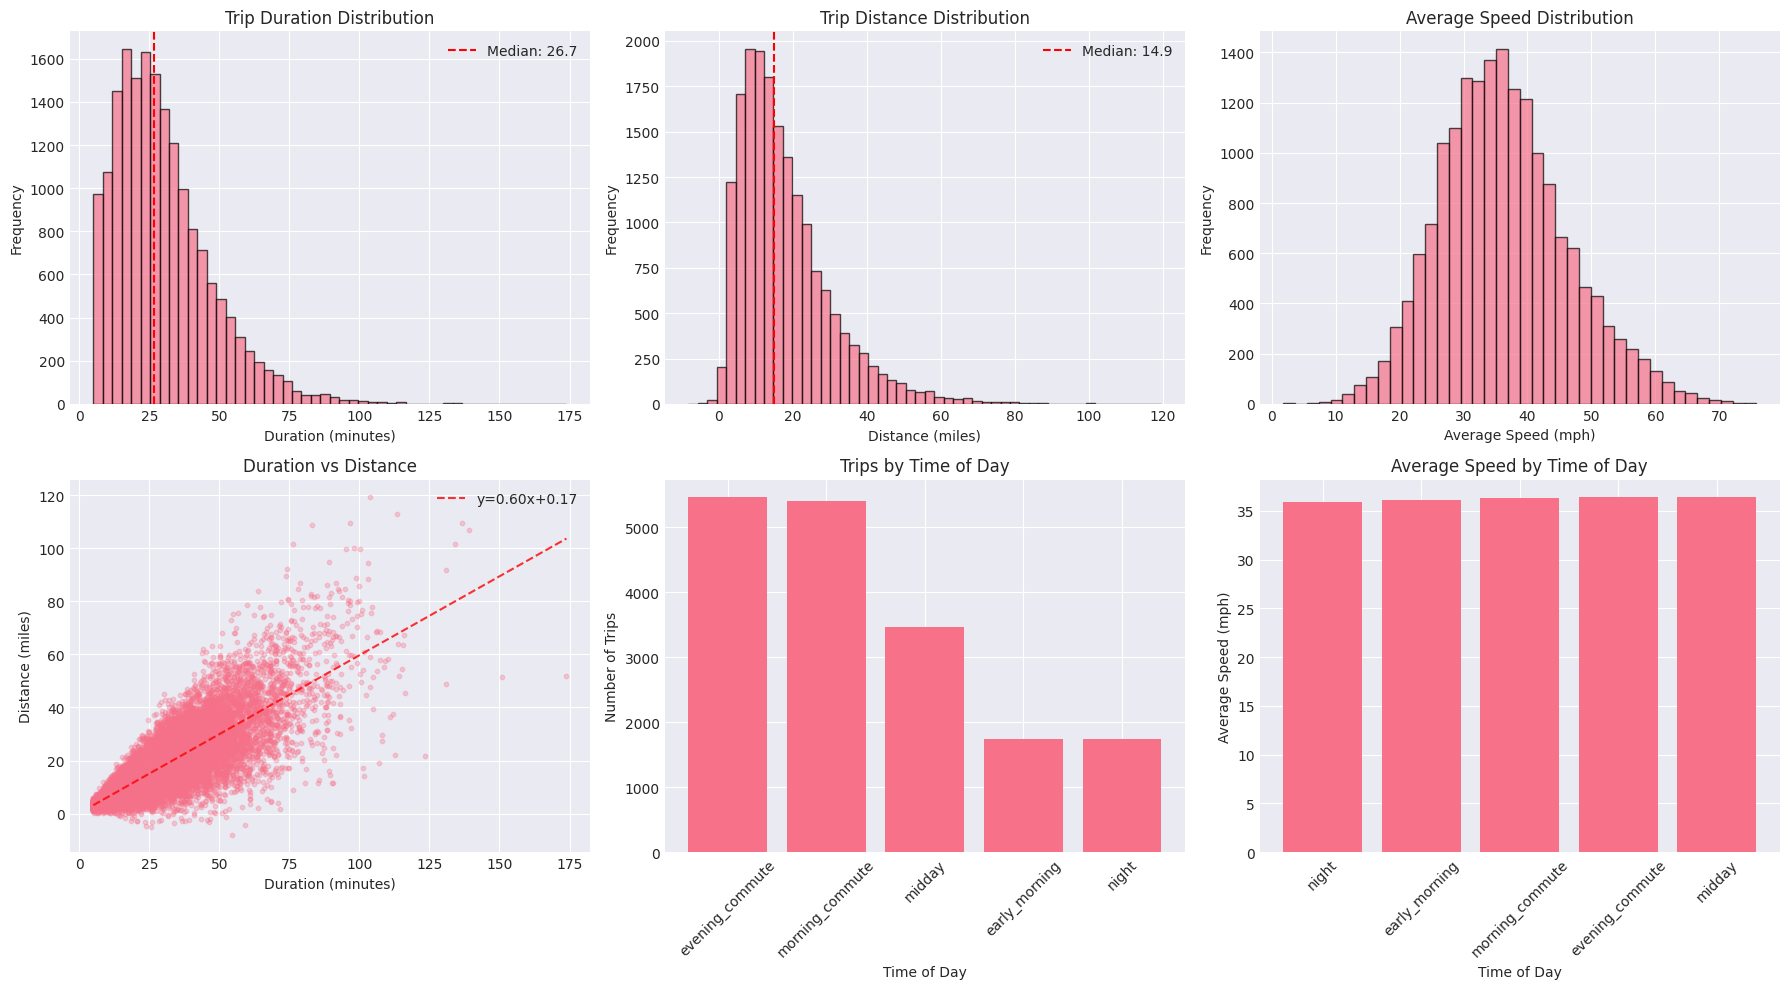

In [8]:
# Create figure with subplots for trip characteristics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

# Duration distribution
axes[0].hist(df['duration_minutes'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Duration (minutes)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Trip Duration Distribution')
axes[0].axvline(df['duration_minutes'].median(), color='red', linestyle='--', 
                label=f'Median: {df["duration_minutes"].median():.1f}')
axes[0].legend()

# Distance distribution
axes[1].hist(df['distance_miles'], bins=50, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Distance (miles)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Trip Distance Distribution')
axes[1].axvline(df['distance_miles'].median(), color='red', linestyle='--',
                label=f'Median: {df["distance_miles"].median():.1f}')
axes[1].legend()

# Speed distribution
axes[2].hist(df['average_speed_mph'], bins=40, edgecolor='black', alpha=0.7)
axes[2].set_xlabel('Average Speed (mph)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Average Speed Distribution')

# Duration vs Distance scatter
axes[3].scatter(df['duration_minutes'], df['distance_miles'], alpha=0.3, s=10)
axes[3].set_xlabel('Duration (minutes)')
axes[3].set_ylabel('Distance (miles)')
axes[3].set_title('Duration vs Distance')

# Add regression line
z = np.polyfit(df['duration_minutes'], df['distance_miles'], 1)
p = np.poly1d(z)
axes[3].plot(df['duration_minutes'].sort_values(), 
             p(df['duration_minutes'].sort_values()), 
             "r--", alpha=0.8, label=f'y={z[0]:.2f}x+{z[1]:.2f}')
axes[3].legend()

# Time of day distribution
time_counts = df['time_of_day'].value_counts()
axes[4].bar(time_counts.index, time_counts.values)
axes[4].set_xlabel('Time of Day')
axes[4].set_ylabel('Number of Trips')
axes[4].set_title('Trips by Time of Day')
axes[4].tick_params(axis='x', rotation=45)

# Average speed by time of day
speed_by_time = df.groupby('time_of_day')['average_speed_mph'].mean().sort_values()
axes[5].bar(speed_by_time.index, speed_by_time.values)
axes[5].set_xlabel('Time of Day')
axes[5].set_ylabel('Average Speed (mph)')
axes[5].set_title('Average Speed by Time of Day')
axes[5].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 5. Driving Behavior Analysis

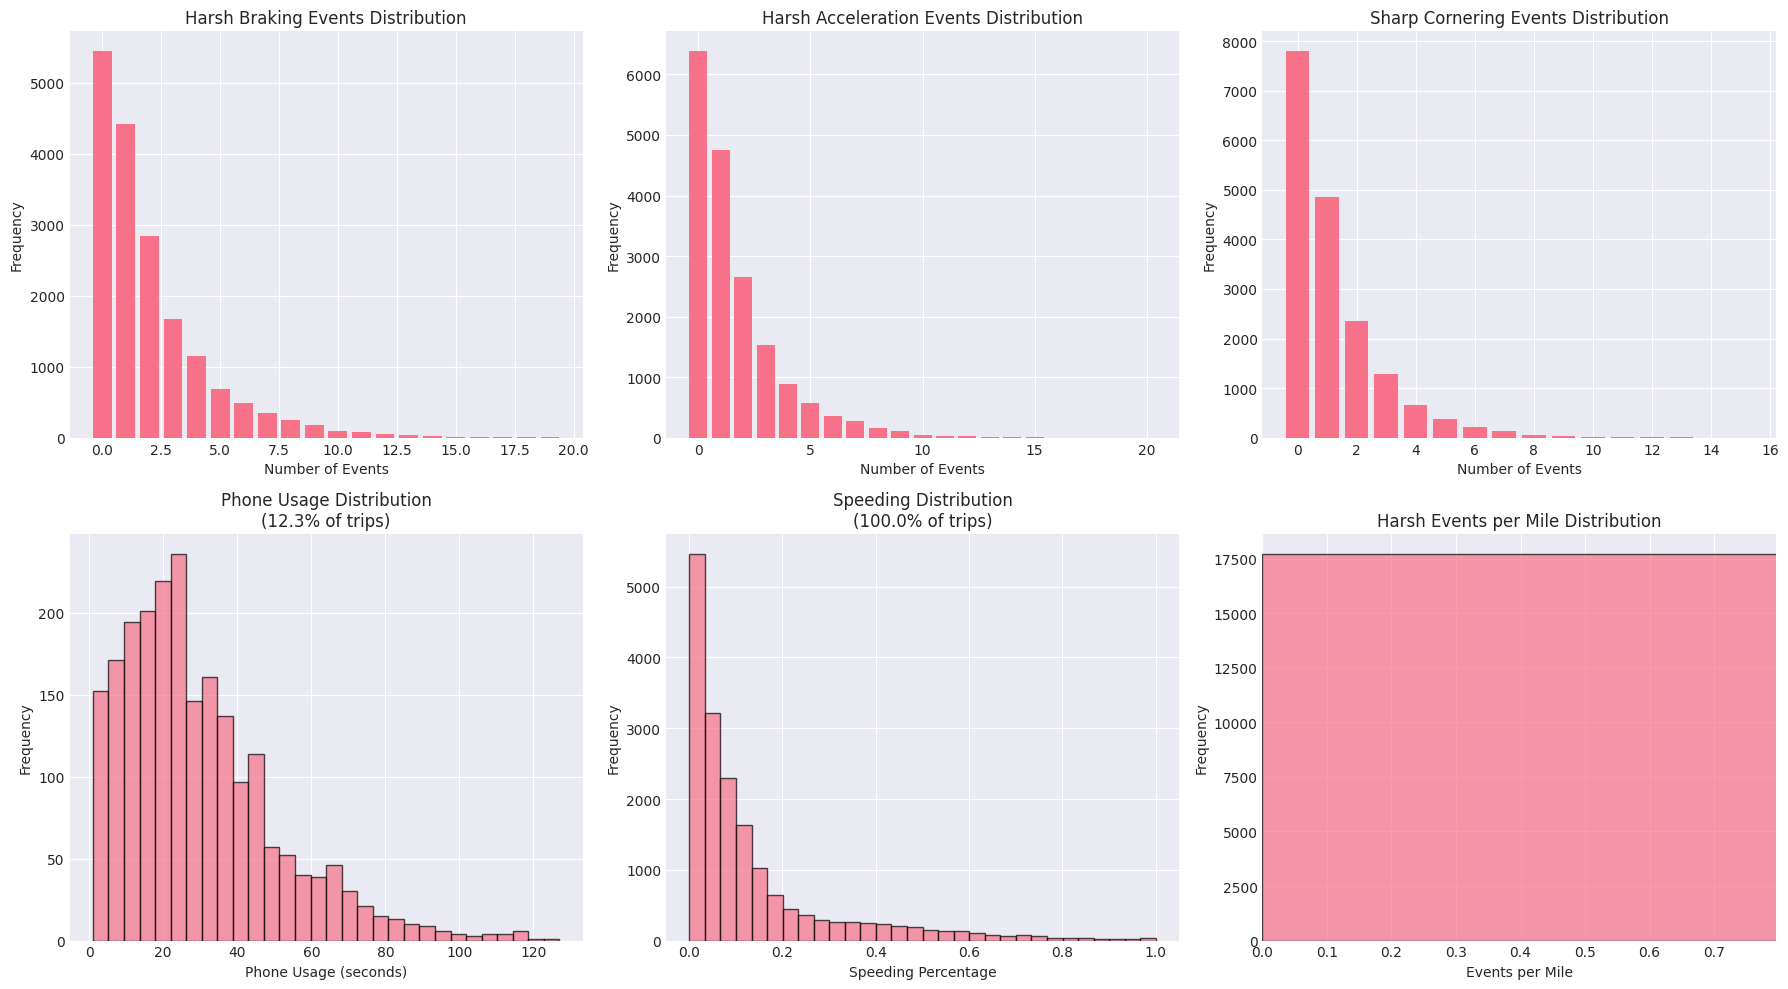

In [9]:
# Calculate total harsh events per trip
df['total_harsh_events'] = (df['harsh_braking_events'] + 
                            df['harsh_acceleration_events'] + 
                            df['sharp_cornering_events'])

# Events per mile
df['events_per_mile'] = df['total_harsh_events'] / df['distance_miles'].clip(lower=0.1)

# Create behavior analysis plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

# Harsh events distribution
events_cols = ['harsh_braking_events', 'harsh_acceleration_events', 'sharp_cornering_events']
for i, col in enumerate(events_cols):
    event_counts = df[col].value_counts().sort_index()
    axes[i].bar(event_counts.index[:20], event_counts.values[:20])
    axes[i].set_xlabel('Number of Events')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{col.replace("_", " ").title()} Distribution')

# Phone usage analysis
phone_users = df[df['phone_usage_seconds'] > 0]
axes[3].hist(phone_users['phone_usage_seconds'], bins=30, edgecolor='black', alpha=0.7)
axes[3].set_xlabel('Phone Usage (seconds)')
axes[3].set_ylabel('Frequency')
axes[3].set_title(f'Phone Usage Distribution\n({len(phone_users)/len(df)*100:.1f}% of trips)')

# Speeding percentage distribution
speeding_trips = df[df['speeding_percent'] > 0]
axes[4].hist(speeding_trips['speeding_percent'], bins=30, edgecolor='black', alpha=0.7)
axes[4].set_xlabel('Speeding Percentage')
axes[4].set_ylabel('Frequency')
axes[4].set_title(f'Speeding Distribution\n({len(speeding_trips)/len(df)*100:.1f}% of trips)')

# Events per mile distribution
axes[5].hist(df['events_per_mile'], bins=50, edgecolor='black', alpha=0.7)
axes[5].set_xlabel('Events per Mile')
axes[5].set_ylabel('Frequency')
axes[5].set_title('Harsh Events per Mile Distribution')
axes[5].set_xlim(0, df['events_per_mile'].quantile(0.95))

plt.tight_layout()
plt.show()


## 6. Risk Indicators Correlation

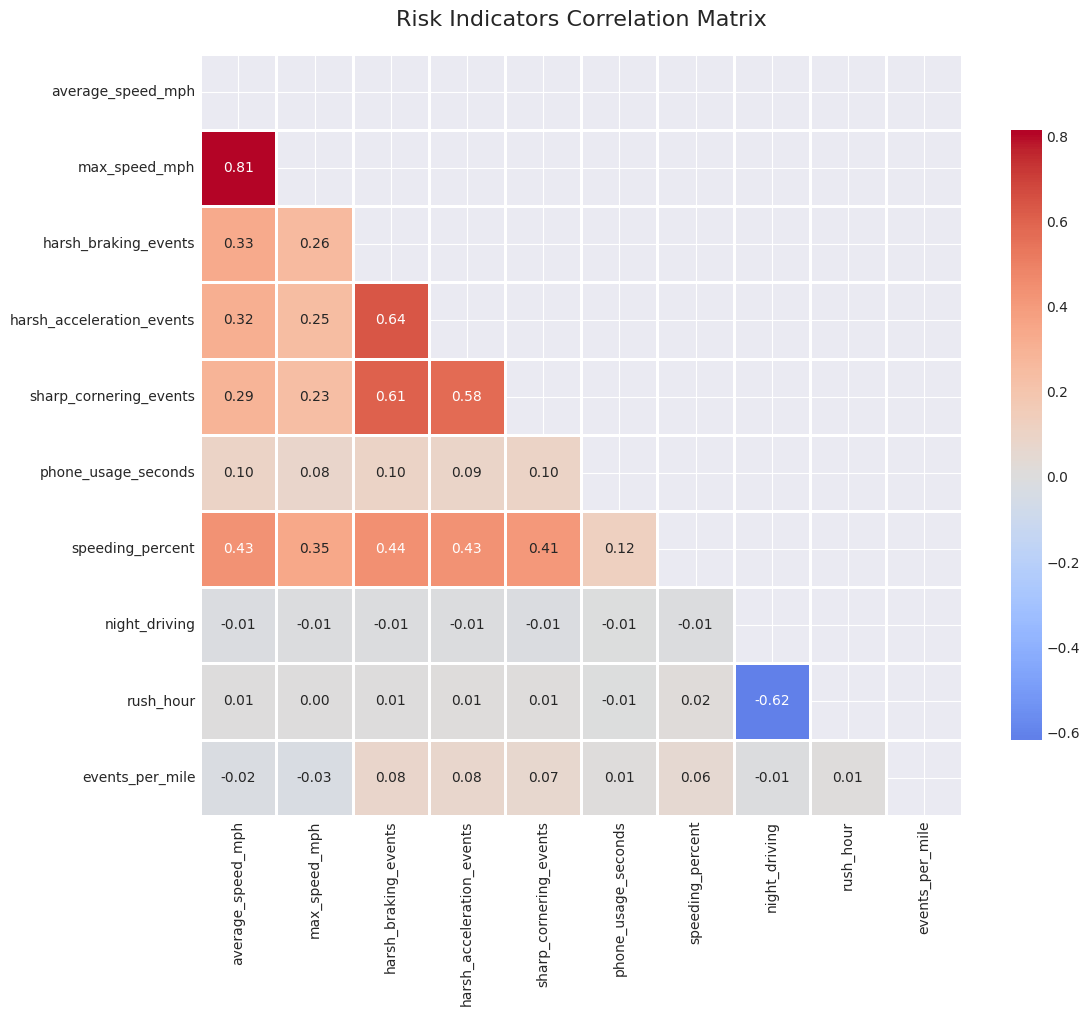

In [10]:
# Create risk-related features for correlation analysis
risk_features = [
    'average_speed_mph', 'max_speed_mph', 'harsh_braking_events',
    'harsh_acceleration_events', 'sharp_cornering_events',
    'phone_usage_seconds', 'speeding_percent', 'night_driving',
    'rush_hour', 'events_per_mile'
]

# Calculate correlation matrix
corr_matrix = df[risk_features].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": .8})
plt.title('Risk Indicators Correlation Matrix', fontsize=16, pad=20)
plt.tight_layout()
plt.show()


## 7. Driver Risk Profiling

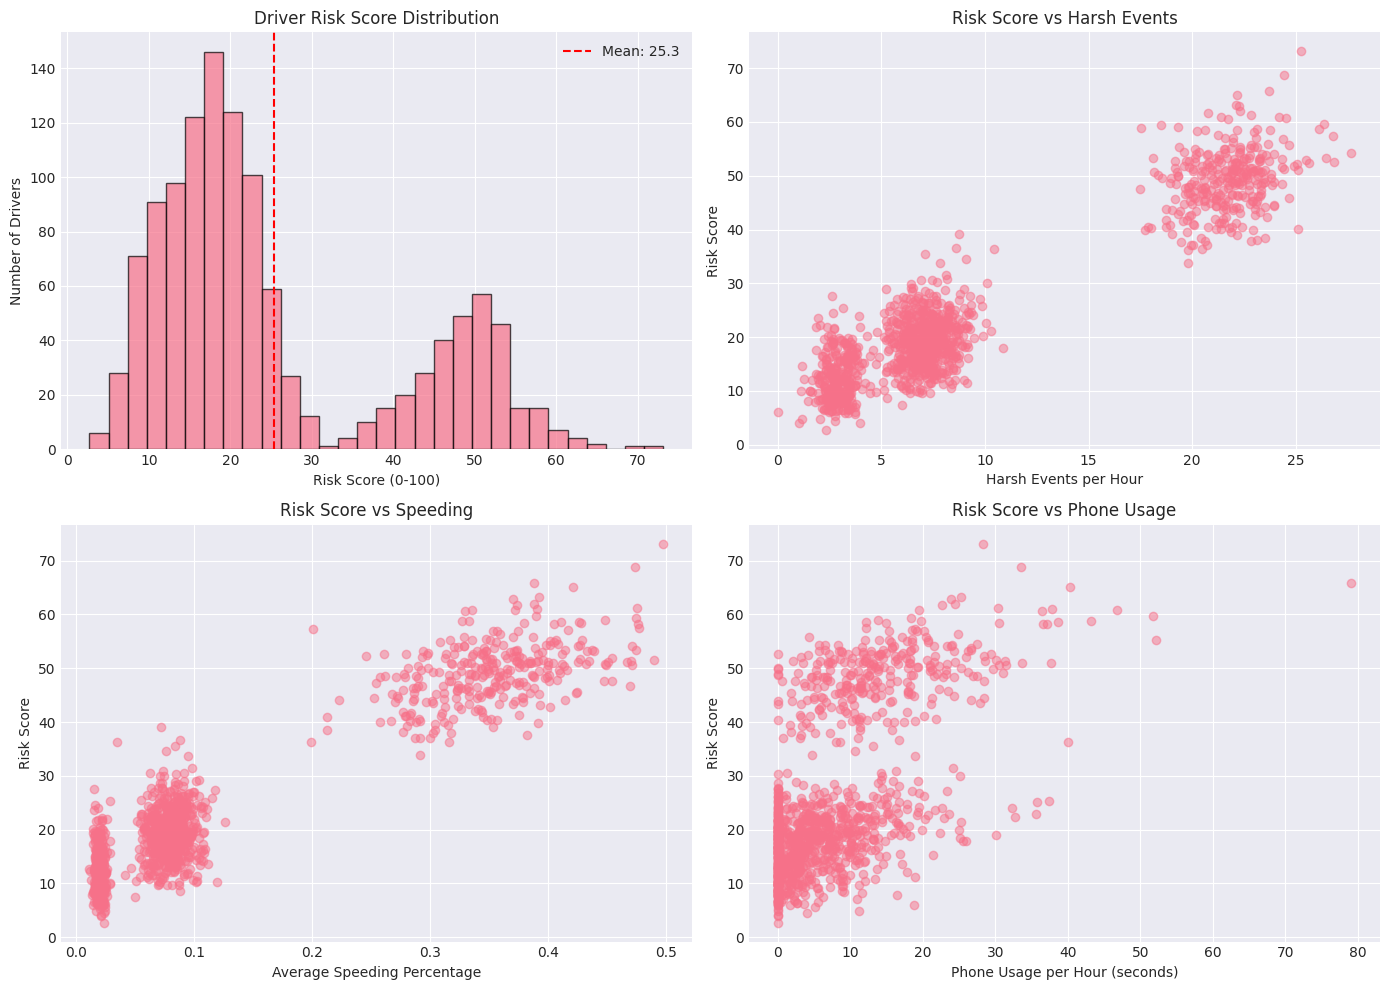


High-risk drivers (top 10%): 120

High-risk driver characteristics:
       harsh_events_per_hour  phone_usage_per_hour  speeding_percent  \
count                 120.00                120.00            120.00   
mean                   22.27                 19.24              0.38   
std                     1.90                 11.65              0.05   
min                    17.52                  0.00              0.20   
25%                    20.97                 11.97              0.34   
50%                    22.14                 17.21              0.37   
75%                    23.25                 24.37              0.41   
max                    27.68                 79.09              0.50   

       night_driving  risk_score  
count         120.00      120.00  
mean            0.25       54.84  
std             0.10        3.97  
min             0.00       50.92  
25%             0.19       52.14  
50%             0.26       53.36  
75%             0.31       56.46  
ma

In [11]:
# Create driver risk scores based on multiple factors
driver_risk = df.groupby('driver_id').agg({
    'harsh_braking_events': 'sum',
    'harsh_acceleration_events': 'sum',
    'sharp_cornering_events': 'sum',
    'phone_usage_seconds': 'sum',
    'speeding_percent': 'mean',
    'night_driving': 'mean',
    'duration_minutes': 'sum'
}).reset_index()

# Normalize by driving time (per hour)
driver_risk['harsh_events_per_hour'] = (
    (driver_risk['harsh_braking_events'] + 
     driver_risk['harsh_acceleration_events'] + 
     driver_risk['sharp_cornering_events']) / 
    (driver_risk['duration_minutes'] / 60)
)

driver_risk['phone_usage_per_hour'] = (
    driver_risk['phone_usage_seconds'] / 
    (driver_risk['duration_minutes'] / 60)
)

# Create risk score (normalized 0-100)
from sklearn.preprocessing import MinMaxScaler

risk_factors = ['harsh_events_per_hour', 'phone_usage_per_hour', 
                'speeding_percent', 'night_driving']
scaler = MinMaxScaler(feature_range=(0, 100))
driver_risk['risk_score'] = scaler.fit_transform(
    driver_risk[risk_factors].values
).mean(axis=1)

# Visualize risk distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

# Risk score distribution
axes[0].hist(driver_risk['risk_score'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Risk Score (0-100)')
axes[0].set_ylabel('Number of Drivers')
axes[0].set_title('Driver Risk Score Distribution')
axes[0].axvline(driver_risk['risk_score'].mean(), color='red', linestyle='--',
                label=f'Mean: {driver_risk["risk_score"].mean():.1f}')
axes[0].legend()

# Risk factors scatter plots
axes[1].scatter(driver_risk['harsh_events_per_hour'], 
                driver_risk['risk_score'], alpha=0.5)
axes[1].set_xlabel('Harsh Events per Hour')
axes[1].set_ylabel('Risk Score')
axes[1].set_title('Risk Score vs Harsh Events')

axes[2].scatter(driver_risk['speeding_percent'], 
                driver_risk['risk_score'], alpha=0.5)
axes[2].set_xlabel('Average Speeding Percentage')
axes[2].set_ylabel('Risk Score')
axes[2].set_title('Risk Score vs Speeding')

axes[3].scatter(driver_risk['phone_usage_per_hour'], 
                driver_risk['risk_score'], alpha=0.5)
axes[3].set_xlabel('Phone Usage per Hour (seconds)')
axes[3].set_ylabel('Risk Score')
axes[3].set_title('Risk Score vs Phone Usage')

plt.tight_layout()
plt.show()

# Identify high-risk drivers
high_risk_threshold = driver_risk['risk_score'].quantile(0.9)
high_risk_drivers = driver_risk[driver_risk['risk_score'] > high_risk_threshold]
print(f"\nHigh-risk drivers (top 10%): {len(high_risk_drivers)}")
print("\nHigh-risk driver characteristics:")
print(high_risk_drivers[['harsh_events_per_hour', 'phone_usage_per_hour', 
                         'speeding_percent', 'night_driving', 'risk_score']].describe().round(2))


## 8. Time-Based Patterns

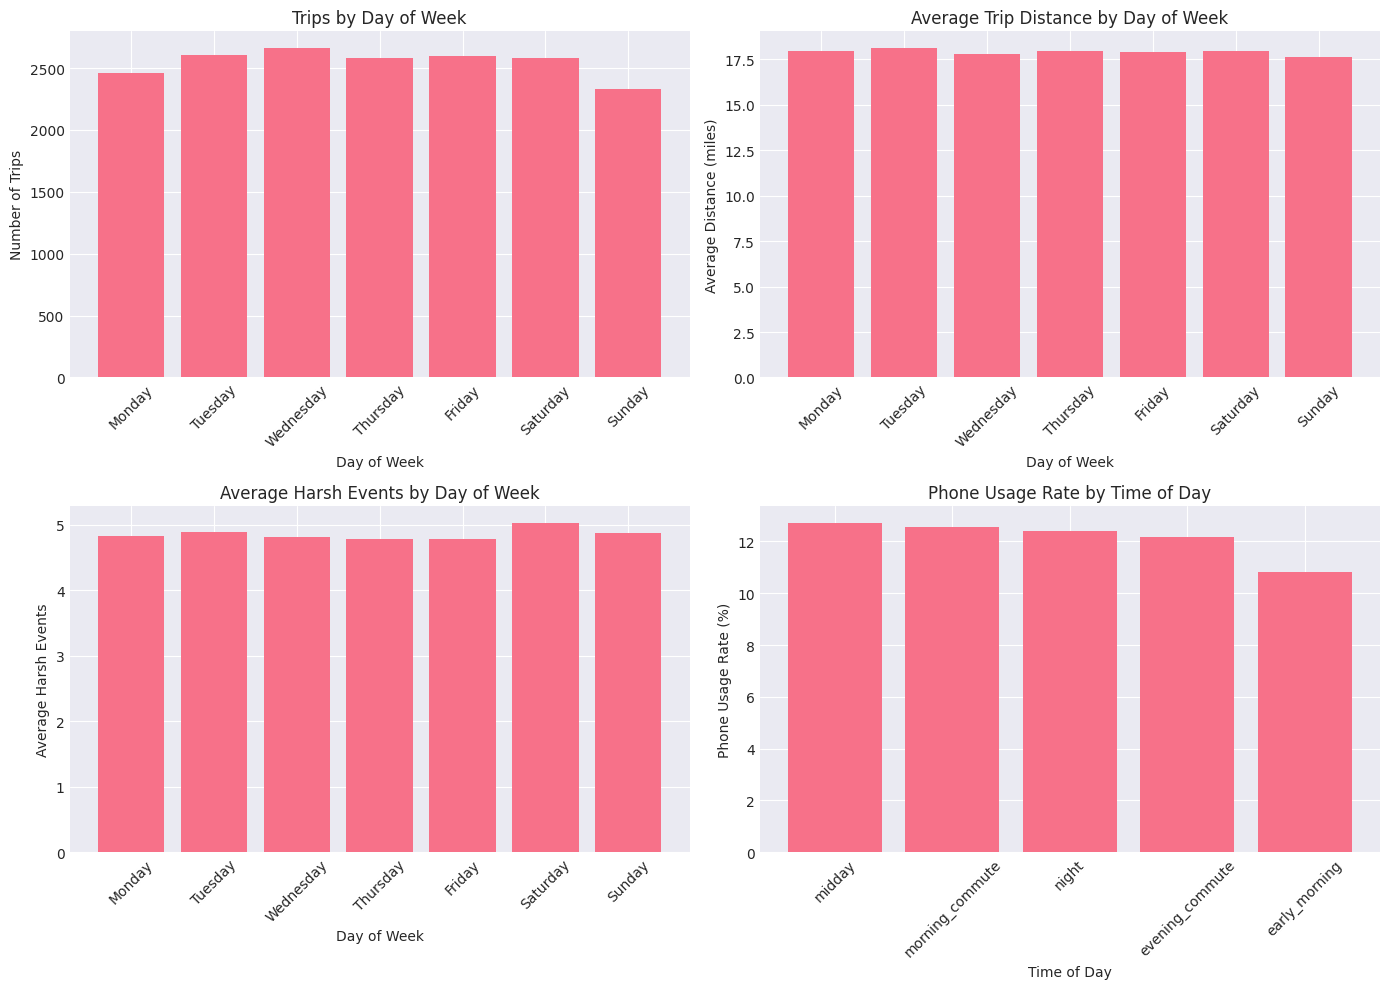

In [12]:
# Add date features for temporal analysis
df['trip_date'] = pd.to_datetime('2024-01-01') + pd.to_timedelta(
    np.random.randint(0, 90, len(df)), unit='D'
)
df['day_of_week'] = df['trip_date'].dt.day_name()
df['week_number'] = df['trip_date'].dt.isocalendar().week

# Analyze patterns by day of week
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

# Trips by day of week
day_counts = df['day_of_week'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts.reindex(day_order)
axes[0].bar(day_counts.index, day_counts.values)
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Number of Trips')
axes[0].set_title('Trips by Day of Week')
axes[0].tick_params(axis='x', rotation=45)

# Average distance by day of week
dist_by_day = df.groupby('day_of_week')['distance_miles'].mean().reindex(day_order)
axes[1].bar(dist_by_day.index, dist_by_day.values)
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Average Distance (miles)')
axes[1].set_title('Average Trip Distance by Day of Week')
axes[1].tick_params(axis='x', rotation=45)

# Harsh events by day of week
events_by_day = df.groupby('day_of_week')['total_harsh_events'].mean().reindex(day_order)
axes[2].bar(events_by_day.index, events_by_day.values)
axes[2].set_xlabel('Day of Week')
axes[2].set_ylabel('Average Harsh Events')
axes[2].set_title('Average Harsh Events by Day of Week')
axes[2].tick_params(axis='x', rotation=45)

# Phone usage by time of day
phone_by_time = df.groupby('time_of_day')['phone_usage_seconds'].apply(
    lambda x: (x > 0).mean() * 100
).sort_values(ascending=False)
axes[3].bar(phone_by_time.index, phone_by_time.values)
axes[3].set_xlabel('Time of Day')
axes[3].set_ylabel('Phone Usage Rate (%)')
axes[3].set_title('Phone Usage Rate by Time of Day')
axes[3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 9. Geographic Patterns

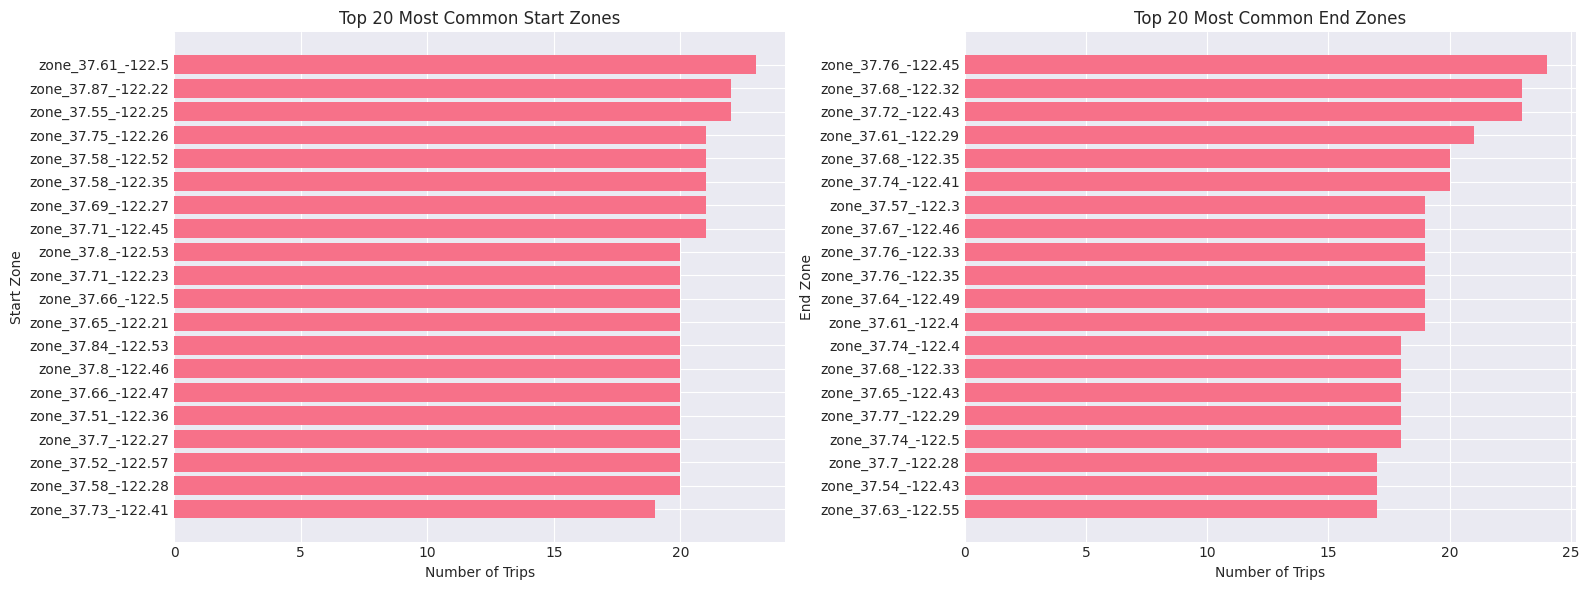


Top 20 most common routes (start → end zone):
zone_37.86_-122.27 → zone_37.95_-122.31: 3 trips
zone_37.8_-122.38 → zone_37.85_-122.38: 2 trips
zone_37.85_-122.54 → zone_37.91_-122.45: 2 trips
zone_37.66_-122.47 → zone_37.71_-122.56: 2 trips
zone_37.57_-122.47 → zone_37.6_-122.38: 2 trips
zone_37.62_-122.26 → zone_37.54_-122.32: 2 trips
zone_37.58_-122.57 → zone_37.55_-122.66: 2 trips
zone_37.84_-122.51 → zone_37.74_-122.48: 2 trips
zone_37.62_-122.49 → zone_37.6_-122.56: 2 trips
zone_37.83_-122.41 → zone_37.75_-122.32: 2 trips
zone_37.8_-122.58 → zone_37.76_-122.5: 2 trips
zone_37.75_-122.42 → zone_37.75_-122.35: 2 trips
zone_37.85_-122.3 → zone_37.83_-122.26: 2 trips
zone_37.7_-122.52 → zone_37.62_-122.48: 2 trips
zone_37.58_-122.27 → zone_37.55_-122.33: 2 trips
zone_37.87_-122.35 → zone_37.92_-122.33: 2 trips
zone_37.63_-122.3 → zone_37.7_-122.22: 2 trips
zone_37.79_-122.27 → zone_37.85_-122.22: 2 trips
zone_37.57_-122.26 → zone_37.52_-122.33: 2 trips
zone_37.83_-122.41 → zone_37.78

In [13]:
# Analyze zone patterns
start_zones = df['start_zone'].value_counts().head(20)
end_zones = df['end_zone'].value_counts().head(20)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Most common start zones
ax1.barh(start_zones.index, start_zones.values)
ax1.set_xlabel('Number of Trips')
ax1.set_ylabel('Start Zone')
ax1.set_title('Top 20 Most Common Start Zones')
ax1.invert_yaxis()

# Most common end zones
ax2.barh(end_zones.index, end_zones.values)
ax2.set_xlabel('Number of Trips')
ax2.set_ylabel('End Zone')
ax2.set_title('Top 20 Most Common End Zones')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

# Analyze trip patterns between zones
zone_pairs = df.groupby(['start_zone', 'end_zone']).size().sort_values(ascending=False).head(20)
print("\nTop 20 most common routes (start → end zone):")
for (start, end), count in zone_pairs.items():
    print(f"{start} → {end}: {count} trips")


## 10. Statistical Summary and Insights

In [16]:
# Create comprehensive summary statistics
print("=== TELEMATICS DATA ANALYSIS SUMMARY ===\n")

print("1. DATASET OVERVIEW")
print(f"   - Total trips: {len(df):,}")
print(f"   - Unique drivers: {df['driver_id'].nunique():,}")
print(f"   - Average trips per driver: {len(df) / df['driver_id'].nunique():.1f}")
print(f"   - Date range: 90 days\n")

print("2. TRIP CHARACTERISTICS")
print(f"   - Average duration: {df['duration_minutes'].mean():.1f} minutes")
print(f"   - Average distance: {df['distance_miles'].mean():.1f} miles")
print(f"   - Average speed: {df['average_speed_mph'].mean():.1f} mph")
print(f"   - Night driving rate: {df['night_driving'].mean()*100:.1f}%")
print(f"   - Rush hour driving rate: {df['rush_hour'].mean()*100:.1f}%\n")

print("3. DRIVING BEHAVIOR")
print(f"   - Trips with harsh braking: {(df['harsh_braking_events'] > 0).mean()*100:.1f}%")
print(f"   - Trips with harsh acceleration: {(df['harsh_acceleration_events'] > 0).mean()*100:.1f}%")
print(f"   - Trips with phone usage: {(df['phone_usage_seconds'] > 0).mean()*100:.1f}%")
print(f"   - Trips with speeding: {(df['speeding_percent'] > 0).mean()*100:.1f}%")
print(f"   - Average harsh events per trip: {df['total_harsh_events'].mean():.2f}\n")

print("4. RISK INDICATORS")
print(f"   - High-risk drivers (top 10%): {len(high_risk_drivers)}")
print(f"   - Average risk score: {driver_risk['risk_score'].mean():.1f}/100")
print(f"   - Risk score std dev: {driver_risk['risk_score'].std():.1f}")

# # Identify key risk factors
# risk_corr = df[risk_factors].corrwith(pd.Series(driver_risk.set_index('driver_id')['risk_score'][df['driver_id']].values))
# print(f"\n5. TOP RISK FACTORS (correlation with risk score):")
# for factor, corr in risk_corr.abs().sort_values(ascending=False).head(5).items():
#     print(f"   - {factor}: {corr:.3f}")


=== TELEMATICS DATA ANALYSIS SUMMARY ===

1. DATASET OVERVIEW
   - Total trips: 17,819
   - Unique drivers: 1,200
   - Average trips per driver: 14.8
   - Date range: 90 days

2. TRIP CHARACTERISTICS
   - Average duration: 29.8 minutes
   - Average distance: 17.9 miles
   - Average speed: 36.3 mph
   - Night driving rate: 19.6%
   - Rush hour driving rate: 61.0%

3. DRIVING BEHAVIOR
   - Trips with harsh braking: 69.4%
   - Trips with harsh acceleration: 64.1%
   - Trips with phone usage: 12.3%
   - Trips with speeding: 100.0%
   - Average harsh events per trip: 4.86

4. RISK INDICATORS
   - High-risk drivers (top 10%): 120
   - Average risk score: 25.3/100
   - Risk score std dev: 15.2


## 11. Export Key Findings

In [15]:
# Save driver risk profiles
driver_risk_export = driver_risk[['driver_id', 'harsh_events_per_hour', 
                                  'phone_usage_per_hour', 'speeding_percent', 
                                  'night_driving', 'risk_score']]
driver_risk_export.to_csv('driver_risk_profiles.csv', index=False)
print("\nExported driver risk profiles to 'driver_risk_profiles.csv'")

# Save trip summary statistics
trip_summary = df.groupby('driver_id').agg({
    'trip_id': 'count',
    'duration_minutes': ['sum', 'mean'],
    'distance_miles': ['sum', 'mean'],
    'total_harsh_events': ['sum', 'mean'],
    'phone_usage_seconds': ['sum', 'mean'],
    'speeding_percent': 'mean'
}).round(2)
trip_summary.columns = ['_'.join(col).strip() for col in trip_summary.columns]
trip_summary.to_csv('driver_trip_summary.csv')
print("Exported driver trip summary to 'driver_trip_summary.csv'")



Exported driver risk profiles to 'driver_risk_profiles.csv'
Exported driver trip summary to 'driver_trip_summary.csv'
